# Applied Linear Algebra

## Fundamental Objects

Scalars, Vectors, and Matrices are the fundamental structures of linear algebra. In the section, we introduce each of those objects and their properties.

### Scalars

Scalars $s$ represent numerical values. Attributes such as the speed of light, the age of a person are scalars.

In [1]:
age = 24    # Age of a person
c = 3e-8    # Celerity of light

### Vectors

Vectors $\vec{v}$ are arrays or collections of scalars. A component of a vector is referred as a coordinate, and the number of coordinates corresponds to the dimensionality $d$ of the vector. In 2D space, a point can be represented as a vector $\vec{p}$ with two components $p_x$ and $p_y$. A vector can also be used to represent multiple attributes such as the age and the height of a person. A scalar can be defined as a one dimensional vector.

$$
\vec{v} = \begin{pmatrix}
v_1 \\
v_2 \\
\vdots \\
v_n
\end{pmatrix}
$$

```{note}
Vectors are represented as column vector by default for convinience (useful for data science)
```

In [2]:
import numpy as np


coords = np.array([1, -1])      # x, y
person = np.array([24, 175])    # age, height

A vector is often refered as a geometric vector representing a direction and its magnitude. Each of its component is reseponsible for the rate of change along its corresponding axis. This kind of vector representation is used in physics to represent the movement of an object with with a velocity $\vec{v}$ vector and an acceleration one $\vec{a}$.

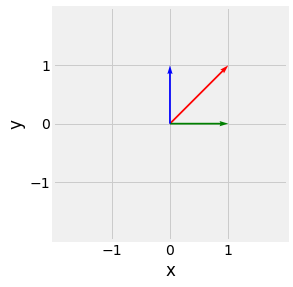

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
plt.style.use('fivethirtyeight')

X = np.array([0, 0, 0])
Y = np.array([0, 0, 0])
U = np.array([1, 1, 0])
V = np.array([1, 0, 1])
C = ["r", "g", "b"]

fig = plt.figure(figsize=(4, 4), facecolor="white")
ax = fig.add_subplot(1, 1, 1)

ax.quiver(X, Y, U, V, color=C, units='xy', scale=1)

ax.set_xticks(range(-1, 1 + 1))
ax.set_yticks(range(-1, 1 + 1))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect("equal")

fig.canvas.draw()

In [4]:
from myst_nb import glue
glue("vector_fig", fig, display=False)

```{glue:figure} vector_fig
:align: center
:name: "vector-fig"

Geometric 2 dimensional vector representation, $\begin{pmatrix}0\\1\end{pmatrix}$ in *blue*, $\begin{pmatrix}1\\0\end{pmatrix}$ in *green*, and $\begin{pmatrix}1\\1\end{pmatrix}$ in *red*. 
```

#### Magnitude and Unit Vector

For a vector of dimension n, the magnitude *(length)* is defined as follow:

$$
\|\vec{v}\| = \sum_{i=1}^n v_i^2
$$

A vector with magnitude one is called a unit vector. Any vector can be transformed into its unit equivalent by dividing it by its magnitude:

$$
\vec{u} = \frac{\vec{v}}{\|\vec{v}\|}
$$

In [5]:
import numpy as np


def magnitude(v: np.ndarray) -> float:
    return np.sqrt((v ** 2).sum())


v = np.array([1, 1])    # Vector
u = v / magnitude(v)    # Unit Vector

# Casting to float32 for floatting point apporximation errors
magnitude(v).astype(np.float32), magnitude(u).astype(np.float32)

(1.4142135, 1.0)

#### Scaling and Addition

A vector can be be multiplied or scaled *(thus divided)*, by any scalar and two vectors of same dimension can be added *(thus subsracted)* together.

$$
\begin{align}
    s\vec{v} = \begin{pmatrix}
    sv_1 \\
    sv_2 \\
    \vdots \\
    s.v_n
    \end{pmatrix} 
    &&
    \vec{u} + \vec{v} = \begin{pmatrix}
    u_1 + v_1 \\
    u_2 + v_2 \\
    \vdots \\
    u_n + v_n
\end{pmatrix} 
\end{align}
$$ 

In [6]:
import numpy as np

s = 1.2                  # Scalar
v = np.array([-2, 5])    # Vector

s * v, v - v

(array([-2.4,  6. ]), array([0, 0]))

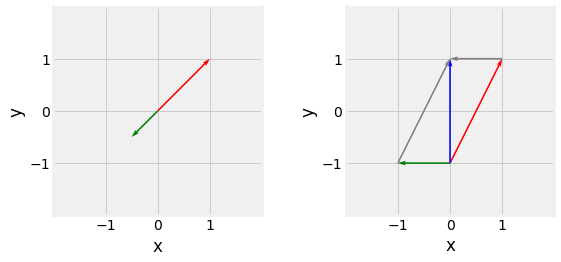

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(8, 4), facecolor="white")
ax1, ax2 = [fig.add_subplot(1, 2, i + 1) for i in range(2)]

X = np.array([0,  0.0])
Y = np.array([0,  0.0])
U = np.array([1, -0.5])
V = np.array([1, -0.5])
C = ["r", "g"]

ax1.quiver(X, Y, U, V, color=C, units='xy', scale=1)

X = np.array([ 0.0,  0.0,  0.0,  1.0, -1.0])
Y = np.array([-1.0, -1.0, -1.0,  1.0, -1.0])
U = np.array([ 1.0, -1.0,  0.0, -1.0,  1.0])
V = np.array([ 2.0,  0.0,  2.0,  0.0,  2.0])
C = ["r", "g", "b", "gray", "gray"]

ax2.quiver(X, Y, U, V, color=C, units='xy', scale=1)

ax1.set_xticks(range(-1, 1 + 1))
ax1.set_yticks(range(-1, 1 + 1))
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
ax1.set_aspect("equal")

ax2.set_xticks(range(-1, 1 + 1))
ax2.set_yticks(range(-1, 1 + 1))
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_xlim(-2, 2)
ax2.set_ylim(-2, 2)
ax2.set_aspect("equal")

fig.subplots_adjust(hspace=0.25, wspace=0.40)
fig.canvas.draw()

In [8]:
from myst_nb import glue
glue("vector_scaling_fig", fig, display=False)

```{glue:figure} vector_scaling_fig
:align: center
:name: "vector-scaling-fig"

Vector scaling (left) with $s=-0.5$, original vector in *red*, scaled in *green*, and Vector addition (right), $\vec{u}$ in *red*,  $\vec{v}$ in green, and $\vec{u}+\vec{v}$ in blue. 
```

#### Dot Product

The dot *(scalar)* product of two n dimensional vectors is defined as follow:

$$
\begin{align}
    \vec{u}.\vec{v} = \|\vec{u}\| \|\vec{u}\| cos(\theta)
    &&
    \vec{u}.\vec{v} = \sum_{i=1}^n u_iv_i
\end{align}
$$

The dot product gives us informations about the angle between two vectors. If $\vec{u}.\vec{v}$ is null, they are perpendicular. Respectively it their dot product is one and both $\vec{u}$ and $\vec{v}$ are unit vectors, they are colinear *(pointing in the same direction)*.

In [9]:
import numpy as np


u = np.array([ 1, 0])
v = np.array([ 0, 1])
w = np.array([-1, 0])

# Perpendicular, Colinear
u.dot(v), u.dot(w)

(0, -1)

#### Cross Product

In a 3 dimensional euclidean space, the cross product between two vectors is define as follow:

$$
\|\vec{u}\| \times \|\vec{v}\| = \begin{pmatrix}
u_y v_z - u_z v_y \\
u_z v_x - u_x v_z \\
u_x v_y - u_y v_x
\end{pmatrix}
$$

The cross product gives birth to a new vector orthogonal to the two others of length $\|\vec{w}\| = \|\vec{u}\| \|\vec{v}\| sin(\theta)$, forming a base $(\vec{u}, \vec{v}, \vec{w})$ with a direction given by the right-hand-rule.

In [10]:
import numpy as np


u = np.array([1, 0, 0])
v = np.array([0, 1, 0])

np.cross(u, v)

array([0, 0, 1])

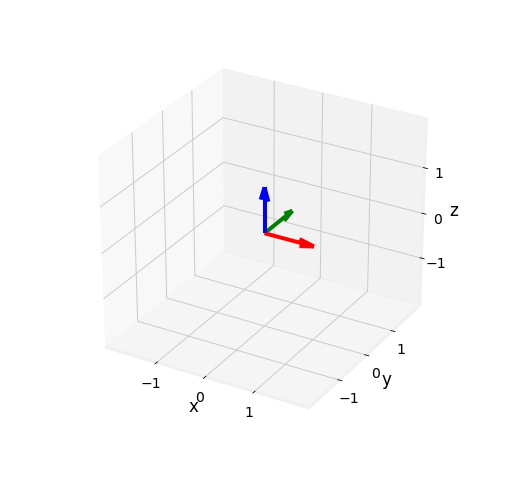

In [11]:
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

X = np.array([0, 0, 0])
Y = np.array([0, 0, 0])
Z = np.array([0, 0, 0])
U = np.array([1, 0, 0])
V = np.array([0, 1, 0])
W = np.array([0, 0, 1])

fig = plt.figure(figsize=(8, 8), facecolor="white")

ax = fig.gca(projection='3d')
ax.quiver(X[0], Y[0], Z[0], U[0], V[0], W[0], color="r")
ax.quiver(X[1], Y[1], Z[1], U[1], V[1], W[1], color="g")
ax.quiver(X[2], Y[2], Z[2], U[2], V[2], W[2], color="b")
ax.patch.set_facecolor('white')
ax.dist = 12

ax.set_xticks(range(-1, 1 + 1))
ax.set_yticks(range(-1, 1 + 1))
ax.set_zticks(range(-1, 1 + 1))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

fig.canvas.draw()

In [12]:
from myst_nb import glue
glue("vector_cross_fig", fig, display=False)

```{glue:figure} vector_cross_fig
:align: center
:name: "vector-cross-fig"

Generic 3 axis Euclidean base. z axis obtained using hte cross product on x and y.
```

### Matrices

Matrices $M_{n \times m}$ represents tables of numericals composed by $n$ rows and $m$ columns. Each component of the matrix $M_{i,j}$ can be referred by a row index $1 \leq i \leq n$ and column index $1 \leq j \leq m$. A matrix can also be seen as a container of $m$ column vectors of dimension $n$. We say $M$ is an $n$ by $m$ matrix and contains $m \times n$ elements. A Vector can be interpreted as a $n \times 1$, and a Scalar as a $1 \times 1$ Matrix.

$$
M_{n \times m} = 
\begin{align}
    \begin{bmatrix}
    m_{1, 1} & m_{1, 2} & \dots & m_{1, m} \\
    m_{2, 1} & m_{2, 2} & \dots & m_{2, m} \\
    \vdots & \vdots & \ddots & \vdots \\
    m_{n, 1} & m_{n, 2} & \dots & m_{n, m}
    \end{bmatrix}
    &
    = \begin{bmatrix}
    | & | &  & | \\
    \vec{v_1} & \vec{v_2} & \dots & \vec{v_m} \\
    | & | &  & |
    \end{bmatrix}
\end{align}
$$

In [13]:
import numpy as np

# 2 by 3 matrix
data = np.array([
    # 1  2  3
    [1, 0, 0], # 1
    [0, 1, 0], # 2
])

data.shape, data.size

((2, 3), 6)

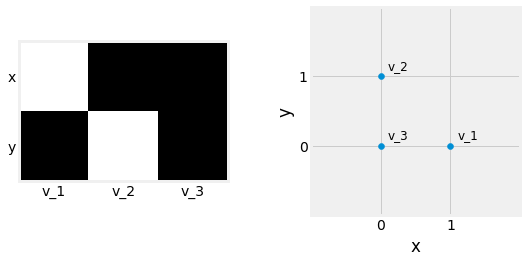

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(8, 4), facecolor="white")
ax1, ax2 = [fig.add_subplot(1, 2, i + 1) for i in range(2)]

img = ax1.imshow(data, interpolation="nearest", cmap="gray")
ax1.set_xticks(range(3))
ax1.set_yticks(range(2))
ax1.set_xticklabels([f"v_{i}" for i in range(1, 3 + 1)])
ax1.set_yticklabels(["x", "y"])
ax1.tick_params(axis=u"both", which=u"both", length=0)
ax1.grid(False)

ax2.scatter(data[0, :], data[1, :])
ax2.set_xlim(-1, 2)
ax2.set_ylim(-1, 2)
ax2.set_xticks(range(0, 2))
ax2.set_yticks(range(0, 2))
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_aspect("equal")
for i, (x, y) in enumerate(zip(data[0, :], data[1, :]), start=1):
    ax2.annotate(f"v_{i}", (x + .1, y + .1), fontsize=12)

fig.subplots_adjust(hspace=0.25, wspace=0.40)
fig.canvas.draw()

In [15]:
from myst_nb import glue
glue("matrix_fig", fig, display=False)

```{glue:figure} matrix_fig
:align: center
:name: "matrix-fig"

Two visualisation of the matrix $\begin{bmatrix}1&0&0\\0&1&0\end{bmatrix}$ composed of the $3$ vectors $\begin{pmatrix}1\\0\end{pmatrix}$, $\begin{pmatrix}0\\1\end{pmatrix}$, and $\begin{pmatrix}0\\0\end{pmatrix}$, as an image left and as point coordinates right.
```

#### Scaling and Addition

As Vectors and Scalars, two Matrices of the same size can be added together. A Matrix can also be scaled by a Scalar.

$$
\begin{align}
    A + B = \begin{bmatrix}
    | & | &  & | \\
    \vec{a_1} + \vec{b_1} & \vec{a_2} + \vec{b_2} & \dots & \vec{a_m} + \vec{b_m} \\
    | & | &  & |
    \end{bmatrix}
    &&
    sA = \begin{bmatrix}
    | & | &  & | \\
    s\vec{a_1} & s\vec{a_2} & \dots & s\vec{a_m} \\
    | & | &  & |
    \end{bmatrix}
\end{align}
$$

#### Transpose

The transpose of a matrix $M^T$ is obtained by flipping its rows and columns. The $n \times m$ Matrix becomes an $m \times n$ by transposition.

$$
M^T = 
\begin{align}
    \begin{bmatrix}
    m_{1, 1} & m_{2, 1} & \dots & m_{m, 1} \\
    m_{1, 2} & m_{2, 2} & \dots & m_{m, 2} \\
    \vdots & \vdots & \ddots & \vdots \\
    m_{1, n} & m_{2, n} & \dots & m_{m, n}
    \end{bmatrix}
    &
    = \begin{bmatrix}
    ─ & \vec{v_1}^T & ─ \\
    ─ & \vec{v_2}^T & ─ \\
    & \vdots & \\
    ─ & \vec{v_m}^T & ─ \\
    \end{bmatrix}
\end{align}
$$

In [16]:
import numpy as np

M = np.array([
    [1, 0 , 0],
    [0, 1 , 0],
])

M_t = M.T

M_t, M_t.shape

(array([[1, 0],
        [0, 1],
        [0, 0]]),
 (3, 2))

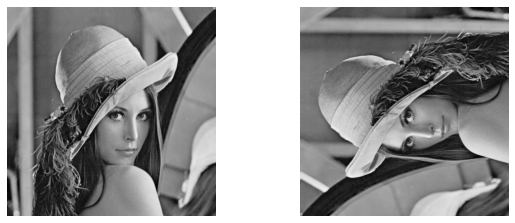

In [17]:
from io import BytesIO
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
plt.ion()
plt.style.use('fivethirtyeight')

import requests

url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
response = requests.get(url)
img = np.array(Image.open(BytesIO(response.content)).convert("L"))

fig = plt.figure(figsize=(8, 4), facecolor="white")
ax1, ax2 = [fig.add_subplot(1, 2, i + 1) for i in range(2)]

ax1.imshow(img, cmap="gray")
ax1.set_axis_off()

ax2.imshow(img.T, cmap="gray")
ax2.set_axis_off()

fig.subplots_adjust(hspace=0.25, wspace=0.40)
fig.canvas.draw()

In [18]:
from myst_nb import glue
glue("matrix_transpose_fig", fig, display=False)

```{glue:figure} matrix_transpose_fig
:align: center
:name: "matrix-transpose-fig"

Grayscale image of [Lenna](https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png), a matrix of size $h \times w$ left, and its transpose of size $w \times h$ right.
```

#### Hadamard Product

The Hadamard product is defined as an element-wise product and requires the two matrices to be of same dimensionality.

$$
A \odot B = \begin{align}
    \begin{bmatrix}
    a_{1, 1} b_{1, 1} & a_{1, 2} b_{1, 2} & \dots & a_{1, m} b_{1, m} \\
    a_{2, 1} b_{2, 1} & a_{2, 2} b_{2, 2} & \dots & a_{2, m} b_{2, m} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{n, 1} b_{n, 1} & a_{n, 2} b_{n, 2} & \dots & a_{n, m} b_{n, m}
    \end{bmatrix}
    &
    = \begin{bmatrix}
    | & | &  & | \\
    \vec{v_1} & \vec{v_2} & \dots & \vec{v_m} \\
    | & | &  & |
    \end{bmatrix}
\end{align}
$$

#### Matrix Multiplication

The Matrix multiplication can be defined as a weighted sum of the column of the second matrix. The matrices needs to follow a size constraint. We need to consider a matrix $A$ of size $n \times m$ and $B$ of size $m \times p$. The number of column of the first matrix has to correspond to the number of rows of the second. The result produces a Matrix of size $n \times p$.

$$
AB_{i, j} = \sum_{k=1}^p a_{i, k} b_{k, j}
$$

It may be easier to interpret the matrix multiplication as the sum of weighted column vectors. Here is a simple numerical example to demonstrate this fact:

$$
\begin{equation}
\begin{split}
AB & = \begin{bmatrix}1 & 0 & 2 \\ 4 & 2 & 3\end{bmatrix} \begin{bmatrix}2 & 1 \\ 0 & 1 \\ 3 & 4 \end{bmatrix} = \begin{bmatrix} 8 & 9 \\ 17 & 18 \end{bmatrix} \\
   & = \begin{pmatrix} 1 \\ 4 \end{pmatrix} \begin{pmatrix} 2 & 1 \end{pmatrix} + \begin{pmatrix} 0 \\ 2 \end{pmatrix} \begin{pmatrix} 0 & 1 \end{pmatrix} + \begin{pmatrix} 2 \\ 3 \end{pmatrix} \begin{pmatrix} 3 & 4 \end{pmatrix}
\end{split}
\end{equation}
$$

In [19]:
import numpy as np

A = np.array([
    [1, 0, 2],
    [4, 2, 3],
])

B = np.array([
    [2, 1],
    [0, 1],
    [3, 4],
])

A_hadammard_A = A * A
A_mul_B = A @ B

print(f"Hadammar product:\n{A_hadammard_A}\nshape:\n{A_hadammard_A.shape}\n")
print(f"Matrix Mumtiplication:\n{A_mul_B}\nshape:\n{A_mul_B.shape}")

Hadammar product:
[[ 1  0  4]
 [16  4  9]]
shape:
(2, 3)

Matrix Mumtiplication:
[[ 8  9]
 [17 18]]
shape:
(2, 2)


## Square Matrices

Square Matrix contains as many rows as they have columns, $n \times n$. For short we describe A as a square matrix of size $n$. Square matrices can be added an multiplied together.

#### Diagonal and Triangular Matrices

A matrix with every component set to zeros except its main diagonal numericals is called a diagonal matrix. If all components above the diagonal of a square matrix are zeros, it is called a lower triangular matrix, and respectively upper triangular matrix if all components under the main diagonal are zeros.

$$
\begin{align}
    D_n = \begin{bmatrix}
    d_{1, 1} & 0 & \dots & 0 \\
    0 & d_{2, 1} & \dots & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \dots & d_{n, n}
    \end{bmatrix}
    &&
    L_n = \begin{bmatrix}
    l_{1, 1} & 0 & \dots & 0 \\
    l_{2, 1} & l_{2, 2} & \dots & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    l_{n, 1} & l_{n, 2} & \dots & l_{n, n}
    \end{bmatrix}
    &&
    U_n = \begin{bmatrix}
    u_{1, 1} & u_{1, 2} & \dots & u_{1, n} \\
    0 & u_{2, 2} & \dots & u_{2, n} \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \dots & u_{n, n}
    \end{bmatrix}
\end{align}
$$

In [20]:
import numpy as np


I3 = np.eye(3)                  # Identity Matrix of size 3
L3 = np.tril(np.ones(3))        # Lower Triangular Matrix of size 3
U3 = 1 - np.tril(np.ones(3))    # Upper Triangular Matrix of size 3

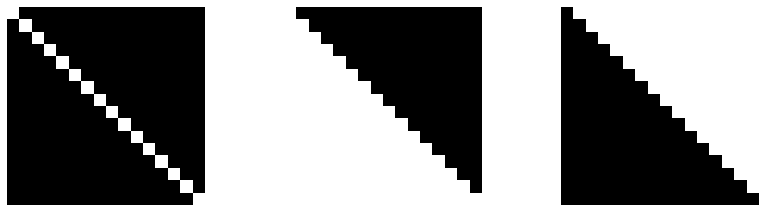

In [21]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12, 4), facecolor="white")
ax1, ax2, ax3 = [fig.add_subplot(1, 3, i + 1) for i in range(3)]

ax1.imshow(np.eye(16), interpolation="nearest", cmap="gray")
ax1.set_axis_off()

ax2.imshow(np.tril(np.ones(16)), interpolation="nearest", cmap="gray")
ax2.set_axis_off()

ax3.imshow(1 - np.tril(np.ones(16)), interpolation="nearest", cmap="gray")
ax3.set_axis_off()

fig.subplots_adjust(hspace=0.25, wspace=0.40)
fig.canvas.draw()

In [22]:
from myst_nb import glue
glue("matrix_square_fig", fig, display=False)

```{glue:figure} matrix_square_fig
:align: center
:name: "matrix-square-fig"

$16 \times 16$ sqaures matrices, in order Identity, Lower Triangular, Upper Triangular. White is $1$, black is $0$.
```

#### Identity

We define the Identity Matrix $I_n$ as the diagonal matrix with its diagonal numericals set to one:

$$
I_n = \begin{bmatrix}
1 & 0 & \dots & 0 \\
0 & 1 & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & 1
\end{bmatrix}
$$

Its name is due to the fact that its matrix multiplication with any matrix return the matrix unchanged: $A I_n = I_n A = A$

#### Special Square Matrices

A Matrix is defined:
* symetric if $A=A^T$
* invetible if $A^{-1}$ existe tel que $AA^{-1}=A^{-1}A=I_n$
* normal if $A^T A = A A^T$
* orthogonal if $A^T=A^{-1}$

#### Trace

The trace of a Matrix $tr(M)$ is the sum its diagonal components:

$$
\begin{align}tr(AB) = tr(BA) && tr(A) = tr(A^T)\end{align}
$$

In [23]:
import numpy as np

#
#    (1, 0, 0)         (1, 1, 1)    
# tr (0, 1, 0) = 3  tr (1, 1, 1) = 3
#    (0, 0, 1)         (1, 1, 1)    
np.eye(3).trace(), np.ones((3, 3)).trace()

(3.0, 3.0)

#### Determinant

The determinant of a sqaure matrix $det(M)$ allow to encode properties of the matrix. For example, a matrix is invertible if and only if its determinant is nonzero. 

In 2D, the determinant is compute as follow:

$$
\begin{vmatrix}
a & b \\
c & d
\end{vmatrix} = ad - bc
$$

In 3D, the determinant can be computed as follow:

$$
\begin{equation}
\begin{split}
\begin{vmatrix}
a & b & c \\
d & e & f \\
g & h & i
\end{vmatrix}
& = a.\begin{vmatrix}e & f \\ h & i\end{vmatrix} - d.\begin{vmatrix}b & c \\ h & i\end{vmatrix} + g.\begin{vmatrix}b & c \\ e & f\end{vmatrix} \\
& = a(ei - hf) - d(bi - he) + g(bf - ec) \\
& = aei - ahf - dbi + dhc + gbf + gec
\end{split}
\end{equation}
$$

The computation of the determinant can be generalized to higher dimensions and defined in terms of permutations:

$$
det(M) = \sum_{\sigma \in \Sigma} (sgn(\sigma) \prod_{i=1}^n m_{i, \sigma_i})
$$

If we consider a Matrix as a set of basis vectors, the determinant represents the signed area in 2d, volume in 3D, ..., of the n-dimensional parallelotope. 

In [24]:
import numpy as np    
    
    
A = np.array([
    [0, 2],
    [1, 0],
])

det_A = np.linalg.det(A)
A_inv = np.linalg.inv(A) 

A @ A_inv, det_A

(array([[1., 0.],
        [0., 1.]]),
 -2.0)

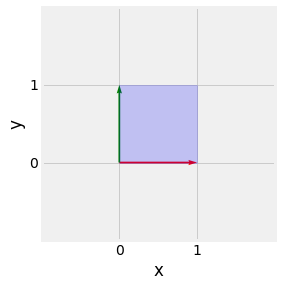

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as plp
plt.ion()
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(4, 4), facecolor="white")
ax = fig.add_subplot(1, 1, 1)

X = np.array([0, 0])
Y = np.array([0, 0])
U = np.array([1, 0])
V = np.array([0, 1])
C = ["r", 'g']

ax.quiver(X, Y, U, V, color=C, units='xy', scale=1)
ax.add_patch(plp.Rectangle([X[0], Y[0]], 1, 1, color="b", alpha=0.2))
ax.set_xlim(-1, 2)
ax.set_ylim(-1, 2)
ax.set_xticks(range(0, 1 + 1))
ax.set_yticks(range(0, 1 + 1))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect("equal")

fig.subplots_adjust(hspace=0.25, wspace=0.40)
fig.canvas.draw()

In [26]:
from myst_nb import glue
glue("matrix_det_fig", fig, display=False)

```{glue:figure} matrix_det_fig
:align: center
:name: "matrix-det-fig"

Visualisation of the determinant of the $I_2$ matrix. $|I_2| = 1$ and the area of a unit square is $1$.
```

## Linear Transformations

Square matrices are pretty useful in the computer graphics domain as it can be used to represent all kinds of space transformations $T$ needed to represent an object transform. Among those transformations are linear transformations: scale, rotation, shear, reflect and orthogonal projection. They have to particularity to allow stacking those transformations using matrix multiplication (order dependant).

$$
\vec{u} = T \vec{v}
$$

### Scale

$$
\begin{align}
    \begin{bmatrix}
    s_x & 0 \\
    0 & s_y
    \end{bmatrix}
    &&
    \begin{bmatrix}
    s_x & 0 & 0 \\
    0 & s_y & 0 \\
    0 & 0 & s_z \\
    \end{bmatrix}
\end{align}
$$

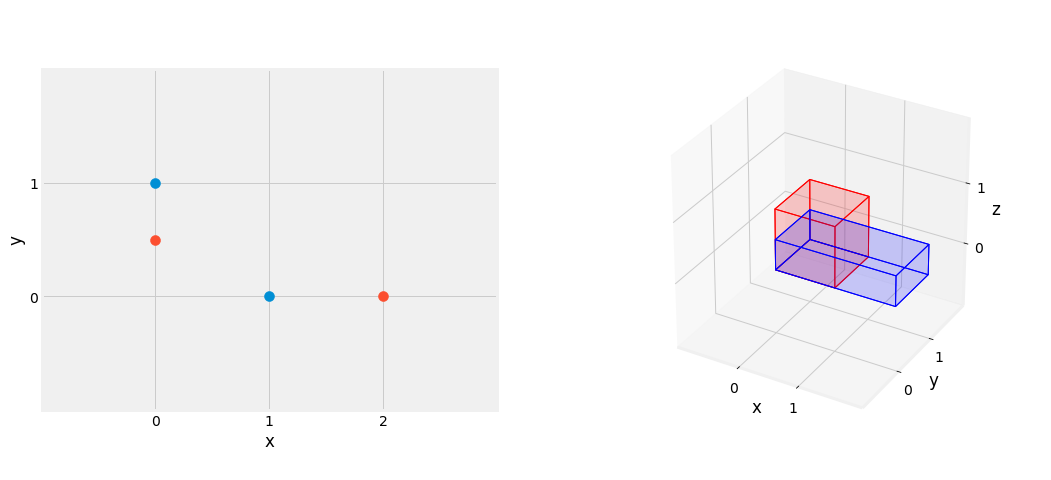

In [27]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

import numpy as np
import matplotlib.pyplot as plt
plt.ion()
plt.style.use('fivethirtyeight')


def cube_verts(cube: np.ndarray) -> np.ndarray:
    vectors = [*(cube[i] - cube[0] for i in range(1, 3 + 1))]
    verts = cube.tolist()
    verts += [cube[0] + vectors[0] + vectors[1]]
    verts += [cube[0] + vectors[0] + vectors[2]]
    verts += [cube[0] + vectors[1] + vectors[2]]
    verts += [cube[0] + vectors[0] + vectors[1] + vectors[2]]
    return np.array(verts).T
    
    
def cube_edges(verts: np.ndarray) -> np.ndarray:
    return np.array([
        [verts[0], verts[3], verts[5], verts[1]],
        [verts[1], verts[5], verts[7], verts[4]],
        [verts[4], verts[2], verts[6], verts[7]],
        [verts[2], verts[6], verts[3], verts[0]],
        [verts[0], verts[2], verts[4], verts[1]],
        [verts[3], verts[6], verts[7], verts[5]],
    ])


fig = plt.figure(figsize=(16, 8), facecolor="white")
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, projection="3d")

X = np.array([
    [1, 0],
    [0, 1],
])

S = np.array([
    [2.0, 0.0],
    [0.0, 0.5],
])
SX = S @ X

ax1.scatter(X[0, :], X[1, :], s=100)
ax1.scatter(SX[0, :], SX[1, :], s=100)
ax1.set_xticks(range(0, 2 + 1))
ax1.set_yticks(range(0, 1 + 1))
ax1.set_xlim(-1, 3)
ax1.set_ylim(-1, 2)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_aspect("equal")

X = cube_verts(np.array((
    (0, 0, 0),
    (0, 1, 0),
    (1, 0, 0),
    (0, 0, 1),
)))

S = np.array([
    [2.0, 0.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, 0.0, 0.5],
])
SX = S @ X

cube1 = Poly3DCollection(cube_edges(X.T), linewidths=1, edgecolors='k')
cube1.set_facecolor((1, 0, 0, 0.1))
cube1.set_edgecolor((1, 0, 0, 1.0))

cube2 = Poly3DCollection(cube_edges(SX.T), linewidths=1, edgecolors='k')
cube2.set_facecolor((0, 0, 1, 0.1))
cube2.set_edgecolor((0, 0, 1, 1.0))

ax2.figure.gca(projection='3d')
ax2.add_collection3d(cube1)
ax2.add_collection3d(cube2)
ax2.set_xticks(np.arange(0, 1 + 1))
ax2.set_yticks(np.arange(0, 1 + 1))
ax2.set_zticks(np.arange(0, 1 + 1))
ax2.set_xlim(-1, 2)
ax2.set_ylim(-1, 2)
ax2.set_zlim(-1, 2)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")
ax2.patch.set_facecolor('white')
ax2.dist = 12

fig.canvas.draw()

In [28]:
from myst_nb import glue
glue("matrix_scale_fig", fig, display=False)

```{glue:figure} matrix_scale_fig
:align: center
:name: "matrix-scale-fig"

Effect of Scaling Matrix, scaling by $2$ on x axis, $0.5$ on y axis, left figure, scaling by $2$ on x axis, $0.5$ on z axis, right figure.
```

### Rotate

$$
\begin{bmatrix}
cos(\theta) & -sin(\theta) \\
sin(\theta) & cos(\theta)
\end{bmatrix}
$$

$$
\begin{align}
    \begin{bmatrix}
    1 & 0 & 0 \\
    0 & cos(\theta) & -sin(\theta) \\
    0 & sin(\theta) & cos(\theta) \\
    \end{bmatrix}
    &&
    \begin{bmatrix}
    cos(\theta) & 0 & sin(\theta) \\
    0 & 1 & 0 \\
    -sin(\theta) & 0 & cos(\theta) \\
    \end{bmatrix}
    &&
    \begin{bmatrix}
    cos(\theta) & -sin(\theta) & 0 \\
    sin(\theta) & cos(\theta) & 0 \\
    0 & 0 & 1 \\
    \end{bmatrix}
\end{align}
$$

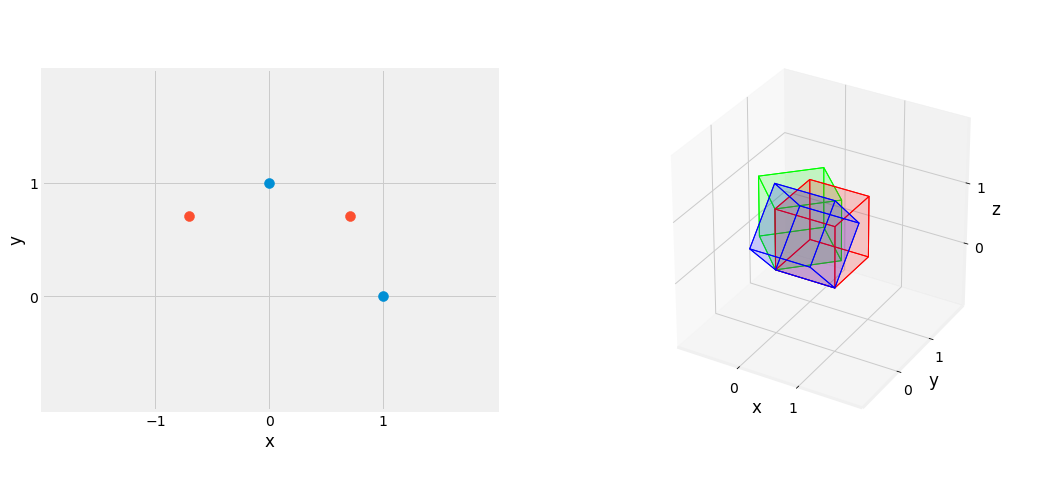

In [29]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

import numpy as np
import matplotlib.pyplot as plt
plt.ion()
plt.style.use('fivethirtyeight')


def cube_verts(cube: np.ndarray) -> np.ndarray:
    vectors = [*(cube[i] - cube[0] for i in range(1, 3 + 1))]
    verts = cube.tolist()
    verts += [cube[0] + vectors[0] + vectors[1]]
    verts += [cube[0] + vectors[0] + vectors[2]]
    verts += [cube[0] + vectors[1] + vectors[2]]
    verts += [cube[0] + vectors[0] + vectors[1] + vectors[2]]
    return np.array(verts).T
    
    
def cube_edges(verts: np.ndarray) -> np.ndarray:
    return np.array([
        [verts[0], verts[3], verts[5], verts[1]],
        [verts[1], verts[5], verts[7], verts[4]],
        [verts[4], verts[2], verts[6], verts[7]],
        [verts[2], verts[6], verts[3], verts[0]],
        [verts[0], verts[2], verts[4], verts[1]],
        [verts[3], verts[6], verts[7], verts[5]],
    ])


fig = plt.figure(figsize=(16, 8), facecolor="white")
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, projection="3d")

theta = 45 * np.pi / 180
X = np.array([
    [1, 0],
    [0, 1],
])

R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta),  np.cos(theta)],
])
RX = R @ X

ax1.scatter(X[0, :], X[1, :], s=100)
ax1.scatter(RX[0, :], RX[1, :], s=100)
ax1.set_xticks(range(-1, 1 + 1))
ax1.set_yticks(range(0, 1 + 1))
ax1.set_xlim(-2, 2)
ax1.set_ylim(-1, 2)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_aspect("equal")

X = cube_verts(np.array((
    (0, 0, 0),
    (0, 1, 0),
    (1, 0, 0),
    (0, 0, 1),
)))

theta = 45 * np.pi / 180
Rx = np.array([
    [1.0,           0.0,            0.0],
    [0.0, np.cos(theta), -np.sin(theta)],
    [0.0, np.sin(theta),  np.cos(theta)],
])
RxX = Rx @ X

Rz = np.array([
    [np.cos(theta), -np.sin(theta), 0.0],
    [np.sin(theta),  np.cos(theta), 0.0],
    [          0.0,            0.0, 1.0],
])
RzX = Rz @ X

cube1 = Poly3DCollection(cube_edges(X.T), linewidths=1, edgecolors='k')
cube1.set_facecolor((1, 0, 0, 0.1))
cube1.set_edgecolor((1, 0, 0, 1.0))

cube2 = Poly3DCollection(cube_edges(RxX.T), linewidths=1, edgecolors='k')
cube2.set_facecolor((0, 0, 1, 0.1))
cube2.set_edgecolor((0, 0, 1, 1.0))

cube3 = Poly3DCollection(cube_edges(RzX.T), linewidths=1, edgecolors='k')
cube3.set_facecolor((0, 1, 0, 0.1))
cube3.set_edgecolor((0, 1, 0, 1.0))

ax2.figure.gca(projection='3d')
ax2.add_collection3d(cube1)
ax2.add_collection3d(cube2)
ax2.add_collection3d(cube3)
ax2.set_xticks(np.arange(0, 1 + 1))
ax2.set_yticks(np.arange(0, 1 + 1))
ax2.set_zticks(np.arange(0, 1 + 1))
ax2.set_xlim(-1, 2)
ax2.set_ylim(-1, 2)
ax2.set_zlim(-1, 2)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")
ax2.patch.set_facecolor('white')
ax2.dist = 12

fig.canvas.draw()

In [30]:
from myst_nb import glue
glue("matrix_rotation_fig", fig, display=False)

```{glue:figure} matrix_rotation_fig
:align: center
:name: "matrix-rotation-fig"

Effect of Rotation Matrix, rotating the figure by $45^{\circ}$ left figure, and $45^{\circ}$ on the $x$ axis in blue, and on the $z$ axis in green, right figure.
```

### Shear

$$
\begin{align}
    \begin{bmatrix}
    1 & \lambda \\
    0 & 1
    \end{bmatrix}
    &&
    \begin{bmatrix}
    1 & \lambda_{xy} & \lambda_{xz} \\
    \lambda_{yx} & 1 & \lambda_{yz} \\
    \lambda_{zx} & \lambda_{zy} & 1 \\
    \end{bmatrix}
\end{align}
$$

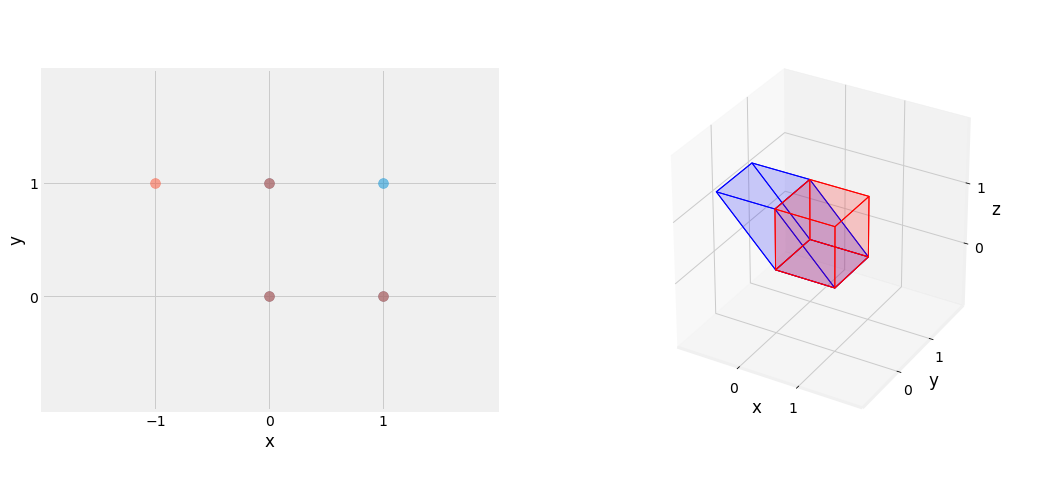

In [31]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

import numpy as np
import matplotlib.pyplot as plt
plt.ion()
plt.style.use('fivethirtyeight')


def cube_verts(cube: np.ndarray) -> np.ndarray:
    vectors = [*(cube[i] - cube[0] for i in range(1, 3 + 1))]
    verts = cube.tolist()
    verts += [cube[0] + vectors[0] + vectors[1]]
    verts += [cube[0] + vectors[0] + vectors[2]]
    verts += [cube[0] + vectors[1] + vectors[2]]
    verts += [cube[0] + vectors[0] + vectors[1] + vectors[2]]
    return np.array(verts).T
    
    
def cube_edges(verts: np.ndarray) -> np.ndarray:
    return np.array([
        [verts[0], verts[3], verts[5], verts[1]],
        [verts[1], verts[5], verts[7], verts[4]],
        [verts[4], verts[2], verts[6], verts[7]],
        [verts[2], verts[6], verts[3], verts[0]],
        [verts[0], verts[2], verts[4], verts[1]],
        [verts[3], verts[6], verts[7], verts[5]],
    ])


fig = plt.figure(figsize=(16, 8), facecolor="white")
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, projection="3d")

theta = 45 * np.pi / 180
X = np.array([
    [1, 1, 0, 0],
    [1, 0, 1, 0],
])

Sh = np.eye(2)
Sh[0, 1] = -1.0
ShX = Sh @ X

ax1.scatter(X[0, :], X[1, :], s=100, alpha=0.5)
ax1.scatter(ShX[0, :], ShX[1, :], s=100, alpha=0.5)
ax1.set_xticks(range(-1, 1 + 1))
ax1.set_yticks(range(0, 1 + 1))
ax1.set_xlim(-2, 2)
ax1.set_ylim(-1, 2)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_aspect("equal")

X = cube_verts(np.array((
    (0, 0, 0),
    (0, 1, 0),
    (1, 0, 0),
    (0, 0, 1),
)))

Sh = np.eye(3)
Sh[0, 2] = -1.0
ShX = Sh @ X

cube1 = Poly3DCollection(cube_edges(X.T), linewidths=1, edgecolors='k')
cube1.set_facecolor((1, 0, 0, 0.1))
cube1.set_edgecolor((1, 0, 0, 1.0))

cube2 = Poly3DCollection(cube_edges(ShX.T), linewidths=1, edgecolors='k')
cube2.set_facecolor((0, 0, 1, 0.1))
cube2.set_edgecolor((0, 0, 1, 1.0))

ax2.figure.gca(projection='3d')
ax2.add_collection3d(cube1)
ax2.add_collection3d(cube2)
ax2.set_xticks(np.arange(0, 1 + 1))
ax2.set_yticks(np.arange(0, 1 + 1))
ax2.set_zticks(np.arange(0, 1 + 1))
ax2.set_xlim(-1, 2)
ax2.set_ylim(-1, 2)
ax2.set_zlim(-1, 2)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")
ax2.patch.set_facecolor('white')
ax2.dist = 12

fig.canvas.draw()

In [32]:
from myst_nb import glue
glue("matrix_shear_fig", fig, display=False)

```{glue:figure} matrix_shear_fig
:align: center
:name: "matrix-shear-fig"

Effect of Rotation Matrix, rotating the figure by $45^{\circ}$ left figure, and $45^{\circ}$ on the $x$ axis in blue, and on the $z$ axis in green, right figure.
```

### Reflect

$$
\begin{align}
    \begin{bmatrix}
    \delta_x & 0 \\
    0 & \delta_y
    \end{bmatrix}
    &&
    \begin{bmatrix}
    \delta_x & 0 & 0 \\
    0 & \delta_y & 0 \\
    0 & 0 & \delta_z \\
    \end{bmatrix}
    &&
    \delta \in \{-1; 1\}
\end{align}
$$

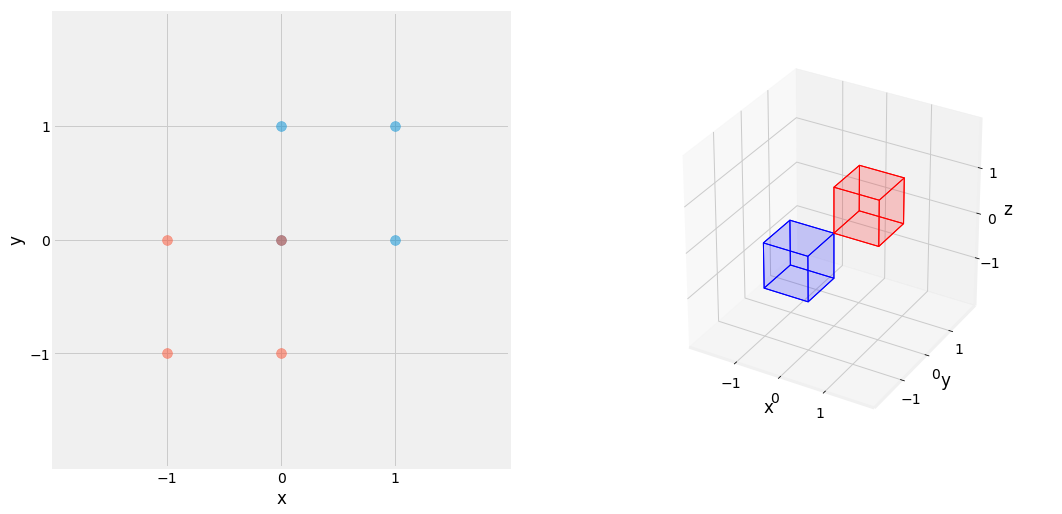

In [33]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

import numpy as np
import matplotlib.pyplot as plt
plt.ion()
plt.style.use('fivethirtyeight')


def cube_verts(cube: np.ndarray) -> np.ndarray:
    vectors = [*(cube[i] - cube[0] for i in range(1, 3 + 1))]
    verts = cube.tolist()
    verts += [cube[0] + vectors[0] + vectors[1]]
    verts += [cube[0] + vectors[0] + vectors[2]]
    verts += [cube[0] + vectors[1] + vectors[2]]
    verts += [cube[0] + vectors[0] + vectors[1] + vectors[2]]
    return np.array(verts).T
    
    
def cube_edges(verts: np.ndarray) -> np.ndarray:
    return np.array([
        [verts[0], verts[3], verts[5], verts[1]],
        [verts[1], verts[5], verts[7], verts[4]],
        [verts[4], verts[2], verts[6], verts[7]],
        [verts[2], verts[6], verts[3], verts[0]],
        [verts[0], verts[2], verts[4], verts[1]],
        [verts[3], verts[6], verts[7], verts[5]],
    ])


fig = plt.figure(figsize=(16, 8), facecolor="white")
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, projection="3d")

theta = 45 * np.pi / 180
X = np.array([
    [1, 1, 0, 0],
    [1, 0, 1, 0],
])

Rf = -np.eye(2)
RfX = Rf @ X

ax1.scatter(X[0, :], X[1, :], s=100, alpha=0.5)
ax1.scatter(RfX[0, :], RfX[1, :], s=100, alpha=0.5)
ax1.set_xticks(range(-1, 1 + 1))
ax1.set_yticks(range(-1, 1 + 1))
ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_aspect("equal")

X = cube_verts(np.array((
    (0, 0, 0),
    (0, 1, 0),
    (1, 0, 0),
    (0, 0, 1),
)))

Rf = -np.eye(3)
RfX = Rf @ X

cube1 = Poly3DCollection(cube_edges(X.T), linewidths=1, edgecolors='k')
cube1.set_facecolor((1, 0, 0, 0.1))
cube1.set_edgecolor((1, 0, 0, 1.0))

cube2 = Poly3DCollection(cube_edges(RfX.T), linewidths=1, edgecolors='k')
cube2.set_facecolor((0, 0, 1, 0.1))
cube2.set_edgecolor((0, 0, 1, 1.0))

ax2.figure.gca(projection='3d')
ax2.add_collection3d(cube1)
ax2.add_collection3d(cube2)
ax2.set_xticks(np.arange(-1, 1 + 1))
ax2.set_yticks(np.arange(-1, 1 + 1))
ax2.set_zticks(np.arange(-1, 1 + 1))
ax2.set_xlim(-2, 2)
ax2.set_ylim(-2, 2)
ax2.set_zlim(-2, 2)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")
ax2.patch.set_facecolor('white')
ax2.dist = 12

fig.canvas.draw()

In [34]:
from myst_nb import glue
glue("matrix_reflect_fig", fig, display=False)

```{glue:figure} matrix_reflect_fig
:align: center
:name: "matrix-reflect-fig"

Effect of Reflection Matrix, reflected on all axis (x and y left, x, y, and z right) in blue.
```

## Affine Transformations

Some transformation matrices are able to preserve lines and parallelism. Those matrices are called Affine Transformations Matrices.

Affine Transformations are represented as a Linear Tranfromation $A$ followed by the addition of a vector $\vec{b}$:

$$
\vec{y} = A \vec{x} + \vec{b}
$$

This suit of matrix/vector operations if often simplified by a single matrix we call the Augmented Matrix.

$$
\begin{bmatrix} \vec{y} \\ 1 \end{bmatrix} = \begin{bmatrix} A & \vec{b} \\ 0 & 1 \end{bmatrix} \begin{bmatrix} \vec{x} \\ 1 \end{bmatrix}
$$

### Tranlsation

In the case of a translation, $A$ is $I_n$ and $\vec{b}$ represent the translation respectively on each axis it is defined on.


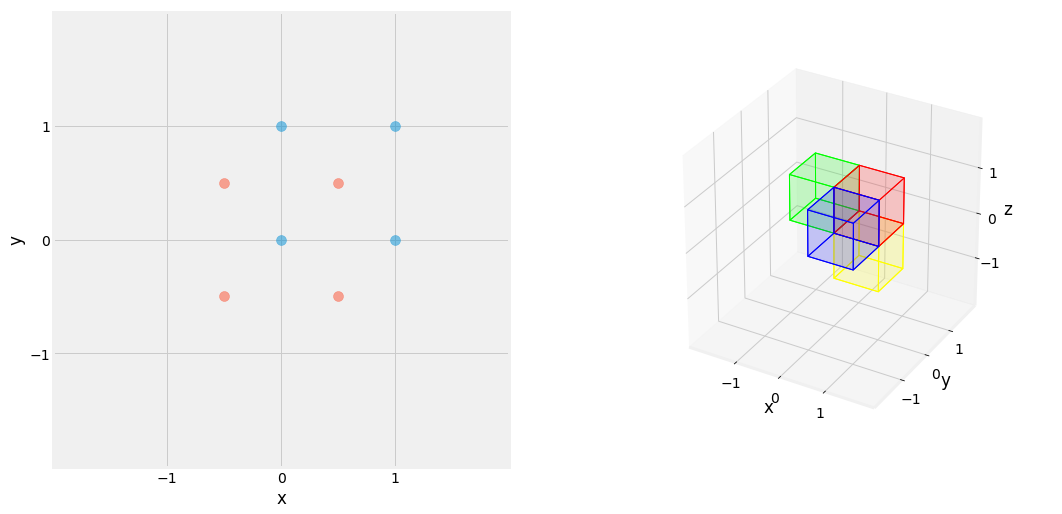

In [35]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

import numpy as np
import matplotlib.pyplot as plt
plt.ion()
plt.style.use('fivethirtyeight')


def cube_verts(cube: np.ndarray) -> np.ndarray:
    vectors = [*(cube[i] - cube[0] for i in range(1, 3 + 1))]
    verts = cube.tolist()
    verts += [cube[0] + vectors[0] + vectors[1]]
    verts += [cube[0] + vectors[0] + vectors[2]]
    verts += [cube[0] + vectors[1] + vectors[2]]
    verts += [cube[0] + vectors[0] + vectors[1] + vectors[2]]
    return np.array(verts).T
    
    
def cube_edges(verts: np.ndarray) -> np.ndarray:
    return np.array([
        [verts[0], verts[3], verts[5], verts[1]],
        [verts[1], verts[5], verts[7], verts[4]],
        [verts[4], verts[2], verts[6], verts[7]],
        [verts[2], verts[6], verts[3], verts[0]],
        [verts[0], verts[2], verts[4], verts[1]],
        [verts[3], verts[6], verts[7], verts[5]],
    ])


fig = plt.figure(figsize=(16, 8), facecolor="white")
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, projection="3d")

theta = 45 * np.pi / 180
X = np.array([
    [1, 1, 0, 0],
    [1, 0, 1, 0],
    [1, 1, 1, 1],
])

T = np.eye(3)
T[0, 2] = -0.5
T[1, 2] = -0.5
TX = T @ X

ax1.scatter(X[0, :], X[1, :], s=100, alpha=0.5)
ax1.scatter(TX[0, :], TX[1, :], s=100, alpha=0.5)
ax1.set_xticks(range(-1, 1 + 1))
ax1.set_yticks(range(-1, 1 + 1))
ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_aspect("equal")

V = cube_verts(np.array((
    (0, 0, 0),
    (0, 1, 0),
    (1, 0, 0),
    (0, 0, 1),
)))
X = np.vstack([V, np.ones((1, V.shape[1]))])

T = np.eye(4)
T[1, 3] = -1
TX1 = T @ X

T = np.eye(4)
T[0, 3] = -1
TX2 = T @ X

T = np.eye(4)
T[2, 3] = -1.0
TX3 = T @ X

cube1 = Poly3DCollection(cube_edges(X[:3].T), linewidths=1, edgecolors='k')
cube1.set_facecolor((1, 0, 0, 0.1))
cube1.set_edgecolor((1, 0, 0, 1.0))

cube2 = Poly3DCollection(cube_edges(TX1[:3].T), linewidths=1, edgecolors='k')
cube2.set_facecolor((0, 0, 1, 0.1))
cube2.set_edgecolor((0, 0, 1, 1.0))

cube3 = Poly3DCollection(cube_edges(TX2[:3].T), linewidths=1, edgecolors='k')
cube3.set_facecolor((0, 1, 0, 0.1))
cube3.set_edgecolor((0, 1, 0, 1.0))

cube4 = Poly3DCollection(cube_edges(TX3[:3].T), linewidths=1, edgecolors='k')
cube4.set_facecolor((1, 1, 0, 0.1))
cube4.set_edgecolor((1, 1, 0, 1.0))

ax2.figure.gca(projection='3d')
ax2.add_collection3d(cube1)
ax2.add_collection3d(cube2)
ax2.add_collection3d(cube3)
ax2.add_collection3d(cube4)
ax2.set_xticks(np.arange(-1, 1 + 1))
ax2.set_yticks(np.arange(-1, 1 + 1))
ax2.set_zticks(np.arange(-1, 1 + 1))
ax2.set_xlim(-2, 2)
ax2.set_ylim(-2, 2)
ax2.set_zlim(-2, 2)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")
ax2.patch.set_facecolor('white')
ax2.dist = 12

fig.canvas.draw()

In [36]:
from myst_nb import glue
glue("matrix_translate_fig", fig, display=False)

```{glue:figure} matrix_translate_fig
:align: center
:name: "matrix-translate-fig"

Effect of Translation Matrix. Red square is translated by $\begin{pmatrix} -0.5 \\ -0.5 \end{pmatrix}$ in blue on left, and red cube is translated by $\begin{pmatrix} 0 \\ -1 \\ 0 \end{pmatrix}$ in blue, $\begin{pmatrix} -1 \\ 0 \\ 0 \end{pmatrix}$ in green, and $\begin{pmatrix} 0 \\ 0 \\ -1 \end{pmatrix}$ in yellow, on right.
```

## Eigen Vectors and Diagonalization

Eigen Vectors is the essence of linear algebra.

### Eigen Vector

A Vector $\vec{x}$ is said to be an eigen vector of the matrix $A$ when the following equation can be satisfied by a scalar $\lambda$ then called an eigen value:

$$
A\vec{x} = \lambda \vec{x}
$$

Eigen vectors for matrix $A$ represent vectors which do not change in terms of its span when the transformation $A$ is applied. The eigen values $\lambda$ represents the strength of strech given by $A$ for its corresponding eigen vector. A n-dimensional has a maximum of n eigen values and independent eigen vectors.

This definition gives us a direct way to compute eigen values as it can be rewritten in the following way:

$$
\begin{equation}
\begin{split}
A\vec{x} - \lambda I \vec{x} & = 0 \\
(A - \lambda I) \vec{x}      & = 0 \\
det(A - \lambda I)           & = 0
\end{split}
\end{equation}
$$

Any $\lambda \in \mathbb{R}$ that satisfies this equation is an eigen value.

The following method shows how to compute the eigen vectors and values of a $2 \times 2$ matrix but can be extended to any n square matrix. Lets consider the following matrix:

$$
A = \begin{bmatrix}
3 & 1 \\
1 & 3
\end{bmatrix}
$$

- Step 1: Find the roots of the characteristic polynomial of $A$ 

$$
\begin{equation}
\begin{split}
det(A - \lambda I_2)       & = 0 \\
(3 - \lambda)^2 - 1        & = 0 \\
(2 - \lambda)(4 - \lambda) & = 0
\end{split}
\end{equation}
$$

In this case we found out $\lambda_1 = 4$ and $\lambda_2 = 2$ are eigen values of the matrix $A$.

- Step2: Replace $\lambda$ by the eigen value found and solve for $\vec{x}$

Replacing $\lambda$ by $\lambda_1 = 4$:

$$
\begin{bmatrix}
-1 & 1 \\
1 & -1
\end{bmatrix} \vec{x_1} = 0
$$

The vector $\vec{x_1}=\begin{pmatrix} 1 \\ 1 \end{pmatrix}$ satisfies the equation and can be assigned as one eigen vector for $A$ with eigen value $\lambda_1$.

Replacing $\lambda$ by $\lambda_2 = 2$:

$$
\begin{bmatrix}
1 & 1 \\
1 & 1
\end{bmatrix} \vec{x_2} = 0
$$

The vector $\vec{x_2}=\begin{pmatrix} -1 \\ 1 \end{pmatrix}$ satisfies the equation and can be assigned as one eigen vector for $A$ with eigen value $\lambda_2$.

In [37]:
import numpy as np


A = np.array([
    [3, 1],
    [1, 3],
])

lambdas, eigen_vects = np.linalg.eig(A)
print(f"eigen value lambda_1: {lambdas[0]} w/ eigen vector x_1: {eigen_vects[:, 0]}")
print(f"eigen value lambda_2: {lambdas[1]} w/ eigen vector x_2: {eigen_vects[:, 1]}")

eigen value lambda_1: 4.0 w/ eigen vector x_1: [0.70710678 0.70710678]
eigen value lambda_2: 2.0 w/ eigen vector x_2: [-0.70710678  0.70710678]


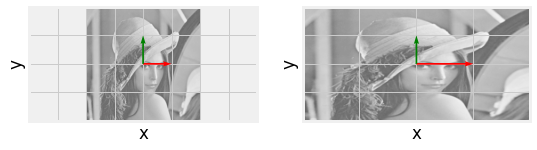

In [38]:
from io import BytesIO
from matplotlib.ticker import MultipleLocator
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
plt.ion()
plt.style.use('fivethirtyeight')

import requests

url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
response = requests.get(url)
img1 = np.array(Image.open(BytesIO(response.content)).convert("L"))
img2 = np.array(Image.open(BytesIO(response.content)).convert("L").resize((256, 128)))

fig = plt.figure(figsize=(8, 4), facecolor="white")
ax1, ax2 = [fig.add_subplot(1, 2, i + 1) for i in range(2)]

X = np.array([ 0,  0])
Y = np.array([ 0,  0])
U = np.array([64,  0])
V = np.array([ 0, 64])
C = ["r", "g"]

img = ax1.imshow(img1, cmap="gray", alpha=0.6, extent=(-128, 128, -128, 128))
ax1.quiver(X, Y, U, V, color=C, units='xy', scale=1, linewidths=100)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), visible=False)
ax1.tick_params(axis='both', which='both', length=0)
ax1.set_xlim(-256, 256)
ax1.set_ylim(-128, 128)
ax1.xaxis.set_major_locator(MultipleLocator(64))
ax1.yaxis.set_major_locator(MultipleLocator(64))

img = ax2.imshow(img2, cmap="gray", alpha=0.6, extent=(-256, 256, -128, 128))
ax2.quiver(X, Y, U * 2, V, color=C, units='xy', scale=1, linewidths=100)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.tick_params(axis='both', which='both', length=0)
ax2.set_xlim(-256, 256)
ax2.set_ylim(-128, 128)
ax2.xaxis.set_major_locator(MultipleLocator(128))
ax2.yaxis.set_major_locator(MultipleLocator(64))

fig.canvas.draw()

In [39]:
from myst_nb import glue
glue("matrix_eigen_fig", fig, display=False)

```{glue:figure} matrix_eigen_fig
:align: center
:name: "matrix-eigen-fig"

Eigen Vector visulaization for $\begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix}$ with eigen values and vectors respectively $\begin{pmatrix} 0 \\ 1 \end{pmatrix}$, and $2 \begin{pmatrix} 1 \\ 0 \end{pmatrix}$. Notice how each eigen vector does not deviate from its span.
```

### Diagonalisation

A n-dimensionel matrix with a set of n normalized linearly independent eigen vectors can be diagonalized in the following form with $V$ the matrix of n eigen column vectors and $\Lambda$ the diagonal matrix with the corresponding eigen values:

$$
A = V \Lambda V^{-1}
$$

$V$ is called the left eigen vector and $V^{-1}$ is the rigth eigen vector. If you are not convinced by this affirmation, one trivial example is the following:

$$
A = \begin{bmatrix} a & 0 \\ 0 & b \end{bmatrix} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} a & 0 \\ 0 & b \end{bmatrix} \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} = I_2 A I_2^{-1}
$$

This matrix decomposition comes pretty handy in various situation du to its properties. For example, considering $f$ as any polynomial function:

$$
f(A) = V^{-1} f(\Lambda) V
$$

In [40]:
import numpy as np


A = np.array([
    [3.0,  0.0],
    [1.0, -2.0],
])

lambdas, eigen_vectors = np.linalg.eig(A)

L = np.diag(lambdas)
V = eigen_vectors / eigen_vectors.max(axis=0)
V_1 = np.linalg.inv(V)

V @ L @ V_1

array([[ 3.,  0.],
       [ 1., -2.]])

## Singular Value Decomposition

The singular value decomposition or SVD for short is the graal of the modern linear algebra and is not limited to square matrices. The SVD consist of obtaining 3 matrices, the left singular vectors $U$ of size $m \times n$, the right singular vector $V$ of size $n \times n$ both orthonormal and $\Sigma$ a diagonal matrix of size $n \times n$ containing numerals called singular values.

$$
\begin{equation}
\begin{split}
A & = USV^T \\
  & = \begin{bmatrix}
      | & & | \\
      \vec{u_1} & \dots & \vec{u_n} \\
      | & & | \\
      \end{bmatrix}
      \begin{bmatrix}
      \sigma_1 & \dots & 0 \\
      \vdots & \ddots & \vdots \\
      0 & \dots & \sigma_n \\
      \end{bmatrix}
      \begin{bmatrix}
      ─ & \vec{v_1}^T & ─ \\
       & \dots & \\
      ─ & \vec{v_n}^T & ─ \\
      \end{bmatrix}
\end{split}
\end{equation}
$$

The SVD of a transformation matrix A tries to capture its essence as a rotation stretched. Its computation procedure is comes quite easily by computing the $AA^T$ and $A^TA$ matrices to solve for $U$ and $V$ separatly. 

$$
\begin{equation}
\begin{split}
AA^T & = USV^TVS^TU^T \\
     & = US^2U^T
\end{split}
\end{equation}
$$

$$
\begin{equation}
\begin{split}
A^TA & = VS^TU^TUSV^T \\
     & = VS^2V^T
\end{split}
\end{equation}
$$

Then, it is a matter of computing the orthonormal eigen vectors and values for the 2 matrices.

In [41]:
import numpy as np


A = np.array([
    [3, 2,  2],
    [2, 3, -2],
])

U, S, V_T = np.linalg.svd(A, full_matrices=False)

U @ np.diag(S) @ V_T

array([[ 3.,  2.,  2.],
       [ 2.,  3., -2.]])

More practically, the SVD of a transform matrix preserves can be seen as a rotation (and/or relfection) $V^T$, a stretch $\Sigma$ and another rotation $U$. This decomposition has real physical meaning and is relatively easy to interpret.

The SVD has the particularity to preserve unitary transformation matrices. Let's observe this phenomenon with an example:

In [42]:
import numpy as np


theta = np.array([12 * np.pi / 180, -340 * np.pi / 180, -350 * np.pi / 180])
Sigma = np.diag([2, 1, 0.5])

Rx = np.array([
    [1,                0,                 0],
    [0, np.cos(theta[0]), -np.sin(theta[0])],
    [0, np.sin(theta[0]),  np.cos(theta[0])],
])

Ry = np.array([
    [ np.cos(theta[0]), 0, np.sin(theta[0])],
    [               0,  1,                0],
    [-np.sin(theta[0]), 0, np.cos(theta[0])],
])

Rz = np.array([
    [np.cos(theta[0]), -np.sin(theta[0]), 0],
    [np.sin(theta[0]),  np.cos(theta[0]), 0],
    [               0,                 0, 1],
])

R = Rz @ Ry @ Rx
A = R @ Sigma
U, S, _ = np.linalg.svd(A, full_matrices=False)

print(f"A:\n{A}\n")
print(f"A (SVD):\n{U @ np.diag(S)}")

A:
[[ 1.91354546 -0.16108567  0.12107575]
 [ 0.40673664  0.96576018 -0.08054283]
 [-0.41582338  0.20336832  0.47838636]]

A (SVD):
[[-1.91354546  0.16108567  0.12107575]
 [-0.40673664 -0.96576018 -0.08054283]
 [ 0.41582338 -0.20336832  0.47838636]]


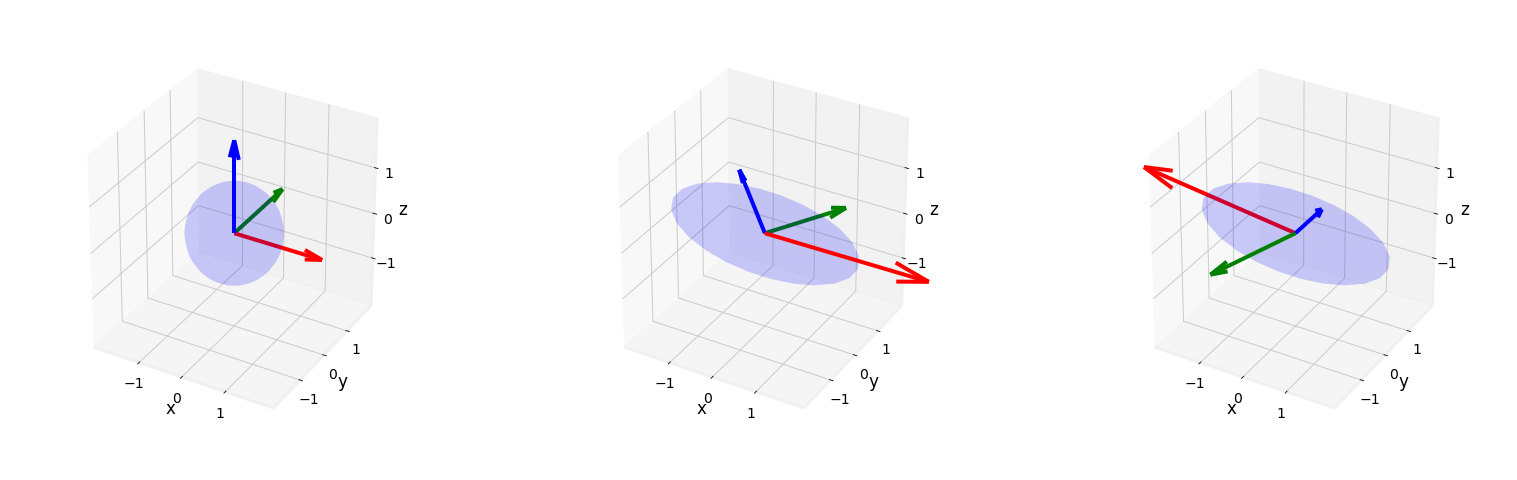

In [43]:
from mpl_toolkits.mplot3d import Axes3D
from typing import Tuple

import numpy as np
import matplotlib.pyplot as plt
plt.ion()
plt.style.use('fivethirtyeight')


array = np.ndarray
array3 = Tuple[array, array, array]
def apply_transformation(X: array, Y: array, Z: array, *, A: array) -> array3:
    M = A @ np.hstack([X.reshape(-1, 1), Y.reshape(-1, 1), Z.reshape(-1, 1)]).T
    return (
        M.T[:, 0].reshape(X.shape),
        M.T[:, 1].reshape(Y.shape),
        M.T[:, 2].reshape(Z.shape),
    )


def plot_axes(ax: plt.Figure, A: np.ndarray = np.eye(3)) -> None:
    M = A @ np.array([
        #x, y, z, u, v, w
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1],
    ])
    X, Y, Z, U, V, W = [M[:, i] for i in range(6)]
    for i, c in enumerate(["r", "g", "b"]):
        ax.quiver(
            X[i], Y[i], Z[i], U[i], V[i], W[i],
            color=c, length=2, arrow_length_ratio=0.2, linewidths=4,
        )
        
        
def plot_unit_sphere(ax: plt.Figure, A: np.ndarray = np.eye(3)) -> None:
    u = np.linspace(-np.pi, np.pi, 25)
    v = np.linspace(0, np.pi, 25)
    X = np.outer(np.cos(u), np.sin(v))
    Y = np.outer(np.sin(u), np.sin(v))
    Z = np.outer(np.ones_like(u), np.cos(v))
    X, Y, Z = apply_transformation(X, Y, Z, A=A)
    ax.plot_surface(X, Y, Z, color="b", alpha=0.1, shade=False, linewidth=0)


fig = plt.figure(figsize=(24, 8), facecolor="white")
ax1 = fig.add_subplot(1, 3, 1, projection="3d")
ax2 = fig.add_subplot(1, 3, 2, projection="3d")
ax3 = fig.add_subplot(1, 3, 3, projection="3d")

plot_unit_sphere(ax1)
plot_axes(ax1)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
ax1.set_zlim(-2, 2)
ax1.set_xticks(range(-1, 2))
ax1.set_yticks(range(-1, 2))
ax1.set_zticks(range(-1, 2))
ax1.patch.set_facecolor('white')
ax1.dist = 12

plot_unit_sphere(ax2, A=A)
plot_axes(ax2, A=A)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")
ax2.set_xlim(-2, 2)
ax2.set_ylim(-2, 2)
ax2.set_zlim(-2, 2)
ax2.set_xticks(range(-1, 2))
ax2.set_yticks(range(-1, 2))
ax2.set_zticks(range(-1, 2))
ax2.patch.set_facecolor('white')
ax2.dist = 12

plot_unit_sphere(ax3, A=U @ np.diag(S))
plot_axes(ax3, A=U @ np.diag(S))
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_zlabel("z")
ax3.set_xlim(-2, 2)
ax3.set_ylim(-2, 2)
ax3.set_zlim(-2, 2)
ax3.set_xticks(range(-1, 2))
ax3.set_yticks(range(-1, 2))
ax3.set_zticks(range(-1, 2))
ax3.patch.set_facecolor('white')
ax3.dist = 12

fig.canvas.draw()

In [ ]:
from myst_nb import glue
glue("matrix_svd_fig", fig, display=False)

```{glue:figure} matrix_svd_fig
:align: center
:name: "matrix-svd-fig"

SVD visualization applied to a unit sphere left, with a rotation and stretch matrix transformation middle, and the reconstructed transformation fater decomposition by svd (using only $U$ and $\Sigma$.
```

## Applications

Linear Algebra is a key concept to represent applied mathematics, wether it is rigid body physics, fluid mechanics, thermodynamics, computer vision, computer graphics, machine learning, and many others. This section details core example applications of linear algebra and especially the SVD.

### Linear System of Equations

Let's considere the over-determined system of linear equations $A \vec{x} = \vec{y}$ with $A$ an $m \times n$ matrix with $m > n$. Let $\vec{r}$ be the residual for $x$: $\vec{r} = A \vec{x} - \vec{y}$. The vector $\vec{\hat{x}}$ is the one that yields the smallest residual, or more precisely the smallest norm $\|\vec{r}\|$, and is refered as the least-squares solution (the best but not unique):

$$
\vec{\hat{x}} = \underset{x \in \mathbb{C}^n}{min} \|\vec{y} - A \vec{x} \|
$$

The least-square solution is given by the rewritting the linear system of equation:

$$
\begin{equation}
\begin{split}
A \vec{\hat{x}}     & = \vec{y} \\
A^T A \vec{\hat{x}} & = A^T \vec{y} \\
\vec{\hat{x}}       & = (A^T A)^{-1} A^T \vec{y} \\
\vec{\hat{x}}       & = A^+ \vec{y}
\end{split}
\end{equation}
$$

```{note}
When $\vec{b}$ is null, the system is called an Homoheneous System, in this case the problem becomes a constraint optimization problem and won't be treated in this chapter.
```

$A^+$ can be computed easily using its singular value decomposition. Using this method, the system becomes:

$$
\vec{\hat{x}} = A^+ \vec{y} = U \Sigma^+ V^T \vec{y}
$$

Let's try to visualize such as system of equations. Let's consider 3 planes and let's find their intersection point:

$$
\begin{align}
    \left\{
    \begin{matrix}
    \begin{split}
    x & + y  & + 0 & = -\frac{1}{2} \\ 
    0 & + y  & + z & = -\frac{1}{2} \\
    x & + 0  & + z & = -\frac{1}{2} \\
    \end{split}
    \end{matrix}
    \right.
    &&
    \begin{bmatrix} 1 & 1 & 0 \\ 0 & 1 & 1 \\ 1 & 0 & 1 \end{bmatrix}
    \begin{bmatrix} x \\ y \\ z \end{bmatrix}
    = \begin{bmatrix} -\frac{1}{2} \\ -\frac{1}{2} \\ -\frac{1}{2} \end{bmatrix}
\end{align}
$$

We can either resolve this system of equations by elimination or using the upper mentionned technique. The solution is: 

$$
\vec{\hat{x}} = \begin{pmatrix} -\frac{1}{4} \\ -\frac{1}{4} \\ -\frac{1}{4} \end{pmatrix}
$$

In [135]:
import numpy as np


A = np.array([
    [1.0, 1.0, 0.0],
    [0.0, 1.0, 1.0],
    [1.0, 0.0, 1.0],
])

Y = np.array([
    [-0.5],
    [-0.5],
    [-0.5],
])

A_plus = np.linalg.inv(A.T @ A) @ A.T
X = A_plus @ Y
print(f"W/ Manual A_plus Computation (inversion):\n{X}\n")

U, S, V_T = np.linalg.svd(A, full_matrices=False)
C = U.T @ Y               # U S V_T x = y <=> S V_T x = U_T y = c
W = np.diag(1 / S) @ C    #   S V_T x = c <=> V_T x = 1/S c = w
X = V_T.T @ W             #     V_T x = w <=> x = (V_T)_T w
print(f"W/ Manual Least Square (SVD):\n{X}\n")

X, *_ = np.linalg.lstsq(A, Y, rcond=1)
print(f"W/ Numpy Least-square Solver:\n{X}")

W/ Manual A_plus Computation (inversion):
[[-0.25]
 [-0.25]
 [-0.25]]

W/ Manual Least Square (SVD):
[[-0.25]
 [-0.25]
 [-0.25]]

W/ Numpy Least-square Solver:
[[-0.25]
 [-0.25]
 [-0.25]]


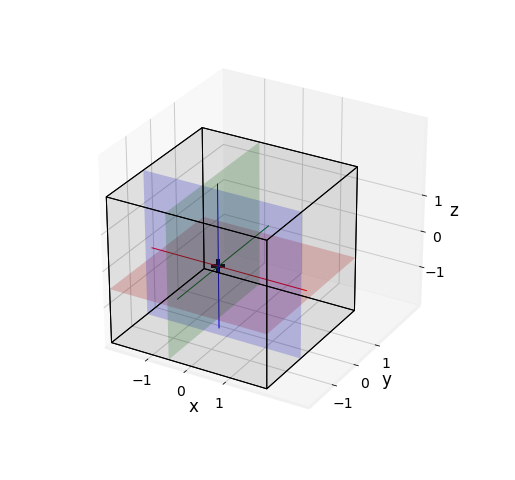

In [159]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
from shapely.geometry import LineString, Polygon

import numpy as np
import matplotlib.pyplot as plt
plt.ion()
plt.style.use('fivethirtyeight')


def cube_verts(cube: np.ndarray) -> np.ndarray:
    vectors = [*(cube[i] - cube[0] for i in range(1, 3 + 1))]
    verts = cube.tolist()
    verts += [cube[0] + vectors[0] + vectors[1]]
    verts += [cube[0] + vectors[0] + vectors[2]]
    verts += [cube[0] + vectors[1] + vectors[2]]
    verts += [cube[0] + vectors[0] + vectors[1] + vectors[2]]
    return np.array(verts).T
    
    
def cube_edges(verts: np.ndarray) -> np.ndarray:
    return np.array([
        [verts[0], verts[3], verts[5], verts[1]],
        [verts[1], verts[5], verts[7], verts[4]],
        [verts[4], verts[2], verts[6], verts[7]],
        [verts[2], verts[6], verts[3], verts[0]],
        [verts[0], verts[2], verts[4], verts[1]],
        [verts[3], verts[6], verts[7], verts[5]],
    ])


r, c = 2, -0.25

fig = plt.figure(figsize=(8, 8), facecolor="white")
ax = fig.add_subplot(1, 1, 1, projection="3d")

X = cube_verts(np.array((
    (-r, -r, -r),
    (-r,  r, -r),
    ( r, -r, -r),
    (-r, -r,  r),
)))

cube = Poly3DCollection(cube_edges(X.T), linewidths=1, edgecolors='k')
cube.set_facecolor((0, 0, 0, 0.05))
cube.set_edgecolor((0, 0, 0, 1.0))

ax.figure.gca(projection='3d')
ax.add_collection3d(cube)

X, Y = np.meshgrid(range(-r, r + 1), range(-r, r + 1))
Z = np.zeros_like(X) - 0.5
ax.plot_surface(X, Y, Z, color=[1, 0, 0, 0.2])
ax.plot_surface(Z, X, Y, color=[0, 1, 0, 0.2])
ax.plot_surface(X, Z, Y, color=[0, 0, 1, 0.2])

ax.plot([-r, r], [ c, c], [ c, c], linewidth=1, color="r")
ax.plot([ c, c], [-r, r], [ c, c], linewidth=1, color="g")
ax.plot([ c, c], [ c, c], [-r, r], linewidth=1, color="b")

ax.scatter(c, c, c, color="black", marker="+", s=200)

ax.set_xticks(np.arange(-r + 1, r))
ax.set_yticks(np.arange(-r + 1, r))
ax.set_zticks(np.arange(-r + 1, r))
ax.set_xlim(-r, r + 1)
ax.set_ylim(-r, r + 1)
ax.set_zlim(-r, r + 1)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.patch.set_facecolor('white')
ax.dist = 12

fig.canvas.draw()

In [ ]:
from myst_nb import glue
glue("matrix_lse_fig", fig, display=False)

```{glue:figure} matrix_lse_fig
:align: center
:name: "matrix-lse-fig"

Intersection of 3 planes in $\begin{pmatrix} -\frac{1}{4} \\ -\frac{1}{4} \\ -\frac{1}{4} \end{pmatrix}$.
```

### Linear Regression

### Multi-linear Regression

### Image Compression

### Principal Component Analysis

### Eigen Faces